In [1]:
import pickle
import pandas as pd

In [2]:
with open('final.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head()

,username,eye_color,hair,skin_tone,skin_type,skin_concerns,foundation_color,review,recommend,unhelpful,helpful,star
0,creecreex,Brown,Brunette,Deep,Normal,Cellulite,370,I have 370 and I got matched at Sephora. I lik...,1,0,14,100
1,Jijine,Brown,Black,Dark,Combination,Unknown,470,It is like my skin but better. very lightweigh...,1,0,5,100
2,bloodyblondie,Blue,Black,Porcelain,Dry,Blackheads,100,I was so nervous about trying this product bec...,1,0,5,100
3,miralanani,Brown,Brunette,Medium,Combination,Acne,270,This product was amazing! Just fell in love! T...,1,0,5,100
4,shaaliyah,Brown,Black,Deep,Combination,Acne,370,Since purchasing this foundation it's been my ...,1,0,38,100


In [4]:
df.shape

(2657, 12)

In [5]:
df=df[df.star!='100']
df=df[df.star!='80']

In [6]:
df.shape

(826, 12)

# Count Vectorize

In [7]:
from gensim import corpora, models, similarities, matutils
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import logging
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [8]:
stop_words_list=list(ENGLISH_STOP_WORDS.copy())

In [9]:
new_words=['like', 'didn', 'don', 'face', 'just', 'really', 'looked', 'product']
stop_words_list.extend(new_words)

In [10]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2),
                                   stop_words=stop_words_list, max_df=0.6, token_pattern="\\b[a-z][a-z]+\\b")

In [11]:
cv_data=count_vectorizer.fit_transform(df['review'])

In [12]:
cv_as_array= count_vectorizer.fit_transform(df['review']).toarray()

In [13]:
count_vectorizer.fit(df['review'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.6, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['often', 'a', 'much', 'once', 'still', 'fifteen', 'show', 'hereafter', 'yourself', 'three', 'someone', 'never', 'six', 'both', 'am', 'couldnt', 'hereupon', 'such', 'therefore', 'third', 'several', 'eight', 'go', 'namely', 'during', 'in', 'might', 'wherein', 'mostly', 'those', 'whom', 'so...o', 'from', 'enough', 'every', 'like', 'didn', 'don', 'face', 'just', 'really', 'looked', 'product'],
        strip_accents=None, token_pattern='\\b[a-z][a-z]+\\b',
        tokenizer=None, vocabulary=None)

# Check Shape

In [14]:
dt=pd.DataFrame(cv_as_array, columns=count_vectorizer.get_feature_names())

In [15]:
dt.shape

(826, 18369)

In [16]:
counts = count_vectorizer.transform(df['review']).transpose()

In [17]:
counts.shape

(18369, 826)

In [18]:
corpus = matutils.Sparse2Corpus(counts)

In [19]:
id2word = { identifier: word for word, identifier in count_vectorizer.vocabulary_.items()}

In [20]:
len(id2word)

18369

# LDA

In [21]:
lda = models.LdaModel(corpus=corpus, num_topics=5, minimum_probability=0.03, id2word=id2word, passes=100)

In [22]:
lda.print_topics()

[(0,
  '0.006*"dry" + 0.005*"love" + 0.005*"color" + 0.005*"coverage" + 0.004*"oily" + 0.004*"tried" + 0.004*"shade" + 0.004*"look" + 0.003*"good" + 0.003*"wanted"'),
 (1,
  '0.009*"dry" + 0.006*"oily" + 0.005*"work" + 0.005*"love" + 0.005*"coverage" + 0.004*"color" + 0.004*"primer" + 0.003*"shade" + 0.003*"tried" + 0.003*"oily skin"'),
 (2,
  '0.009*"dry" + 0.007*"tried" + 0.005*"look" + 0.005*"primer" + 0.005*"oily" + 0.004*"love" + 0.004*"work" + 0.004*"did" + 0.004*"wanted" + 0.004*"coverage"'),
 (3,
  '0.006*"dry" + 0.004*"look" + 0.004*"love" + 0.003*"oily" + 0.003*"matte" + 0.003*"coverage" + 0.003*"day" + 0.003*"work" + 0.003*"good" + 0.003*"color"'),
 (4,
  '0.006*"love" + 0.005*"dry" + 0.005*"look" + 0.004*"wanted" + 0.004*"pores" + 0.003*"coverage" + 0.003*"color" + 0.003*"wanted love" + 0.003*"work" + 0.003*"did"')]

# LSA

In [23]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [24]:
from sklearn.decomposition import NMF, TruncatedSVD

In [45]:
n_comp = 10
lsa = TruncatedSVD(n_components=n_comp)

lsa_data = lsa.fit_transform(cv_data)

In [46]:
display_topics(lsa,count_vectorizer.get_feature_names(),10)


Topic  0
dry, oily, love, look, work, tried, color, primer, coverage, shade

Topic  1
dry, dry skin, oily, oily skin, zone, combination, spots, dry patches, areas, patches

Topic  2
color, dry, yellow, matched, spot, did, friend, oxidized, wanted, felt

Topic  3
oily, color, oily skin, matte, hours, nice, day, good, great, did

Topic  4
shade, time, beauty, purchased, use, blend, brush, perfect, matched, used

Topic  5
coverage, color, dry, use, primer, match, great, dry skin, medium, color match

Topic  6
love, color, coverage, beauty, wanted love, wanted, blender, beauty blender, love foundation, good

Topic  7
shade, look, love, dry, dry skin, wanted, wanted love, orange, perfect, range

Topic  8
ve, color, tried, match, different, work, shade, ve tried, right, dry

Topic  9
primer, color, fenty, fenty primer, applying, work, hours, applied, maybe, make


In [28]:
import clustering_algorithms

In [29]:
(cv, tfidf)= clustering_algorithms.making_vectorizers(df.review, 10)

In [30]:
cv.fit(df['review'])

In [31]:
cv.kmeans(n_clusters=5)

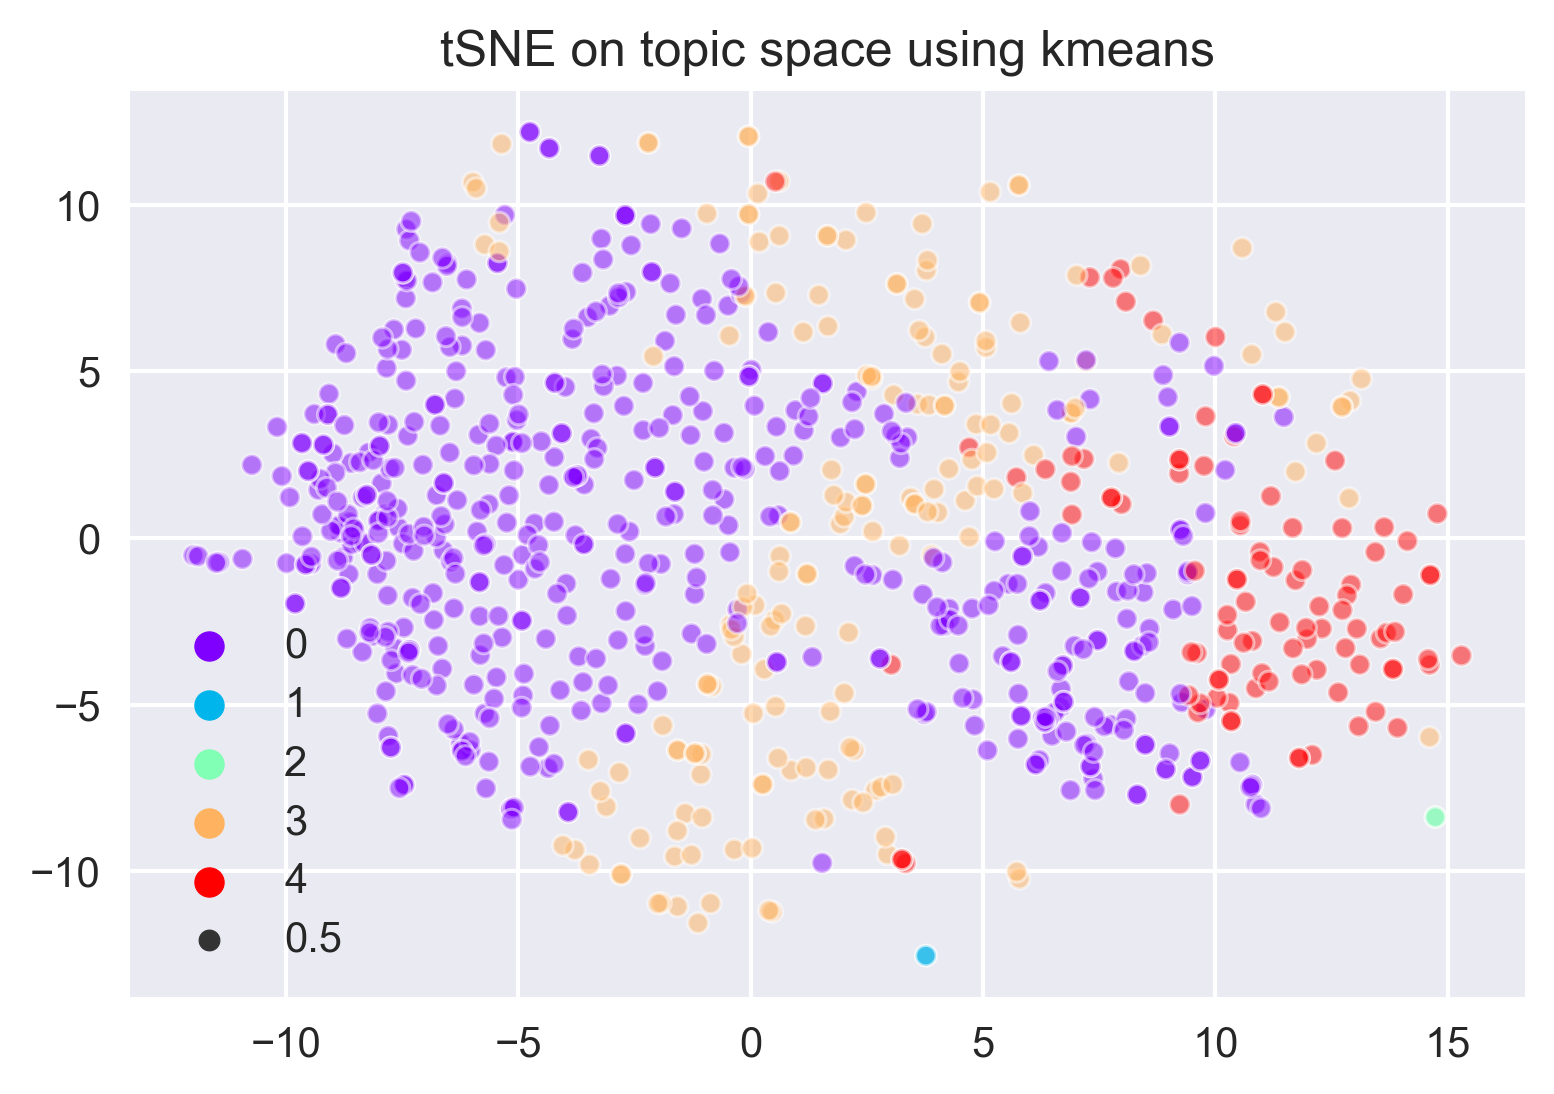

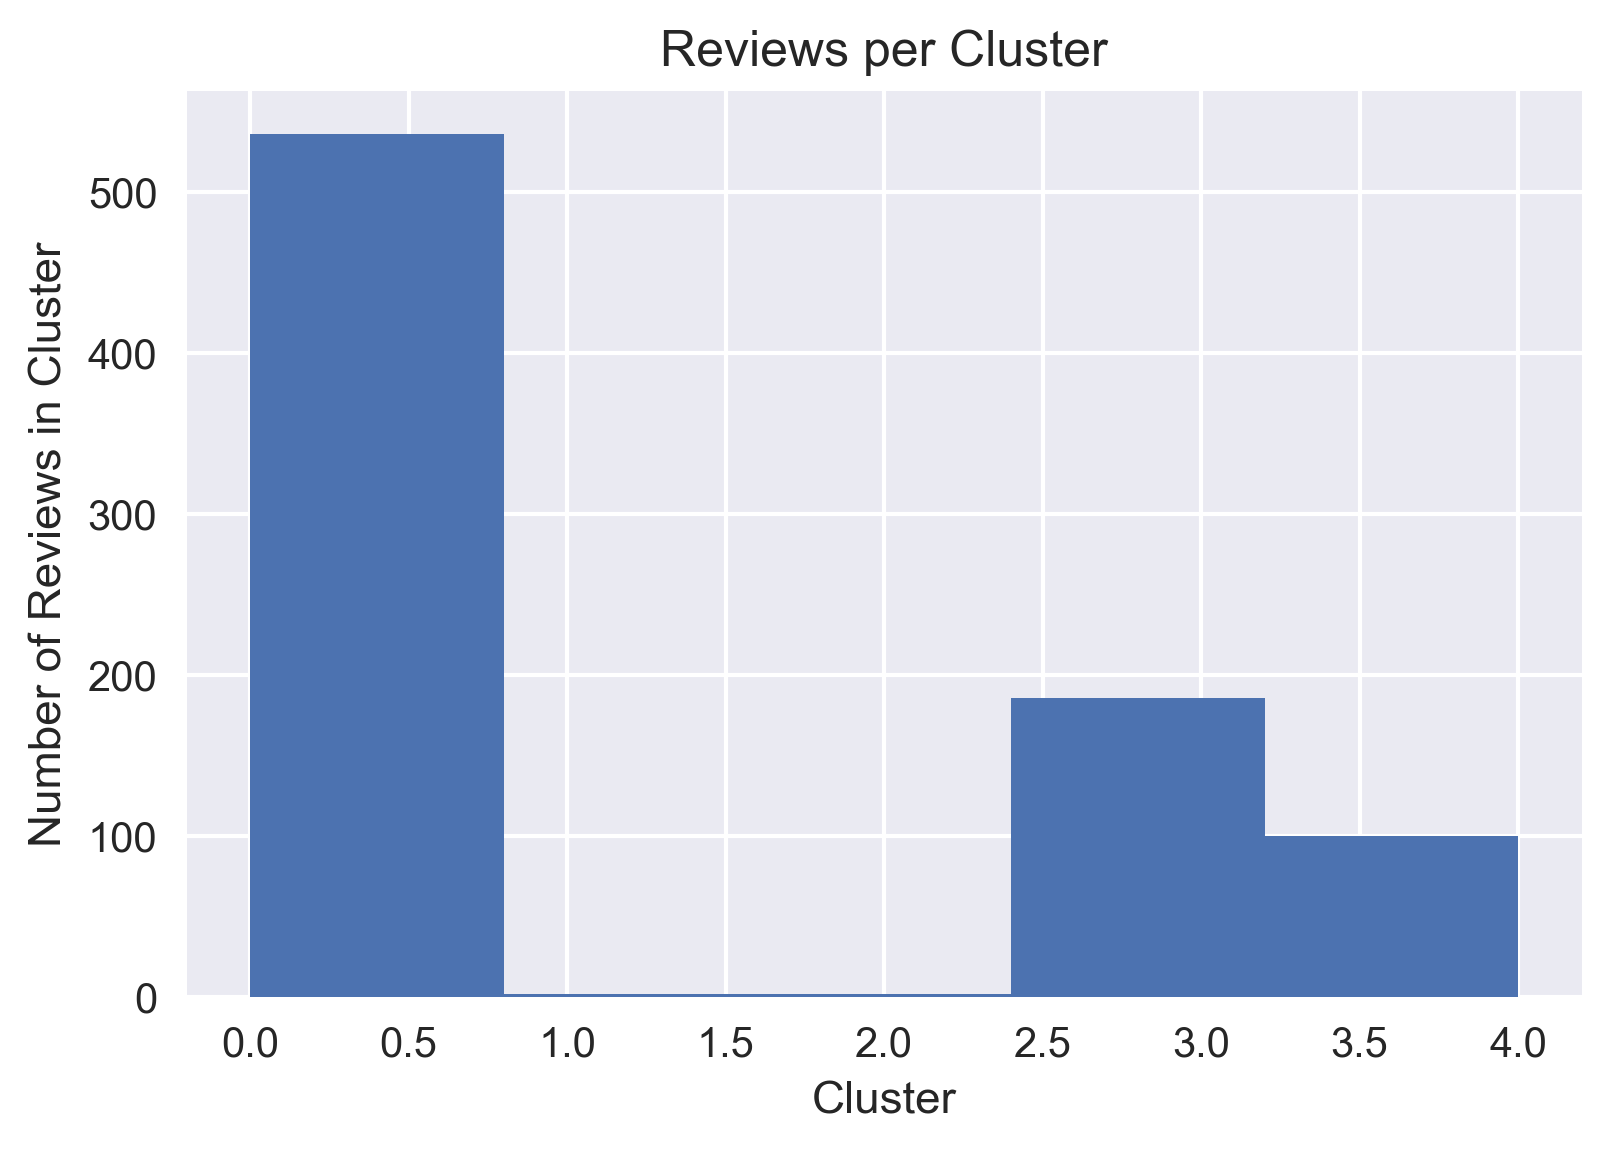

In [32]:
cv.tsne(2,100)

In [33]:
clustering_algorithms.best_cluster(cv, df, 'review')


 + [(0.9159025584579308, 254), (0.9244240023975813, 107), (0.9294535968342783, 166), (0.948771218138084, 611)]

I really wanted to like this product. The color matched perfectly to my pale skin and it look beautiful when you first put it on by itself. Then it ended there. It didn't like to work with any other products besides the other fenty products, and when I used it with the primer and concealer it came with, my skin got very oily and it caked up. I have oily skin so this definitely didn't work for me. I thought maybe Id try a different primer with this, but it DID NOT want to work with it, and it sat on top and separated into ugly dry patches. I returned everything except the highlighter which I love.

I love the color range of this product, and I did find it to be quite long wearing. But I found that no matter what primer I use under it, this foundation emphasizes any texture/pores on my skin, and clings to any dry patches. I tried applying it with a brush and with a sponge, and

In [34]:
df['cluster']=pd.Series(cv.labels_)

In [35]:
df.groupby(['cluster', 'star']).count()

username  eye_color  hair  skin_tone  skin_type  skin_concerns  \
cluster star                                                                   
0.0     20         134        134   134        134        134            134   
        40          46         46    46         46         46             46   
        60          38         38    38         38         38             38   
3.0     20          28         28    28         28         28             28   
        40          15         15    15         15         15             15   
        60          13         13    13         13         13             13   
4.0     20          25         25    25         25         25             25   
        40           9          9     9          9          9              9   
        60           5          5     5          5          5              5   

              foundation_color  review  recommend  unhelpful  helpful  
cluster star                                                           
0.0     20                 134     134        134        134      134  
        40                  46      46         46         46       46  
        60                  38      38         38         38       38  
3.0     20                  28      28         28         28       28  
        40                  15      15         15         15       15  
        60                  13      13         13         13       13  
4.0     20                  25      25         25         25       25  
        40                   9       9          9          9        9  
        60                   5       5          5          5        5

In [36]:
df.groupby(['cluster', 'skin_type']).count()

username  eye_color  hair  skin_tone  skin_concerns  \
cluster skin_type                                                          
0.0     Combination        93         93    93         93             93   
        Dry                34         34    34         34             34   
        Normal             16         16    16         16             16   
        Oily               39         39    39         39             39   
        Unknown            36         36    36         36             36   
3.0     Combination        23         23    23         23             23   
        Dry                10         10    10         10             10   
        Normal              4          4     4          4              4   
        Oily               16         16    16         16             16   
        Unknown             3          3     3          3              3   
4.0     Combination        16         16    16         16             16   
        Dry                 6          6     6          6              6   
        Normal              1          1     1          1              1   
        Oily                9          9     9          9              9   
        Unknown             7          7     7          7              7   

                     foundation_color  review  recommend  unhelpful  helpful  \
cluster skin_type                                                              
0.0     Combination                93      93         93         93       93   
        Dry                        34      34         34         34       34   
        Normal                     16      16         16         16       16   
        Oily                       39      39         39         39       39   
        Unknown                    36      36         36         36       36   
3.0     Combination                23      23         23         23       23   
        Dry                        10      10         10         10       10   
        Normal                      4       4          4          4        4   
        Oily                       16      16         16         16       16   
        Unknown                     3       3          3          3        3   
4.0     Combination                16      16         16         16       16   
        Dry                         6       6          6          6        6   
        Normal                      1       1          1          1        1   
        Oily                        9       9          9          9        9   
        Unknown                     7       7          7          7        7   

                     star  
cluster skin_type          
0.0     Combination    93  
        Dry            34  
        Normal         16  
        Oily           39  
        Unknown        36  
3.0     Combination    23  
        Dry            10  
        Normal          4  
        Oily           16  
        Unknown         3  
4.0     Combination    16  
        Dry             6  
        Normal          1  
        Oily            9  
        Unknown         7